## Введение
Клиентам "Мегалайн" предлагают два тарифных плана: «Смарт» и «Ультра». Чтобы скорректировать рекламный бюджет, мы хотим понять, какой тариф приносит больше денег.
Нужно сделать анализ тарифов на небольшой выборке клиентов. В нашем распоряжении данные 500 пользователей «Мегалайна»: кто они, откуда, каким тарифом пользуются, сколько звонков и сообщений каждый отправил за 2018 год. Нужно проанализировать поведение клиентов и сделать вывод — какой тариф лучше.

Описание тарифов:

Тариф «Смарт»

   - Ежемесячная плата: 550 рублей
   - Включено 500 минут разговора, 50 сообщений и 15 Гб интернет-трафика
   - Стоимость услуг сверх тарифного пакета: 1. минута разговора: 3 рубля («Мегалайн» всегда округляет вверх значения минут и мегабайтов. Если пользователь проговорил всего 1 секунду, в тарифе засчитывается целая минута); 2. сообщение: 3 рубля; 3. 1 Гб интернет-трафика: 200 рублей.

Тариф «Ультра»

   - Ежемесячная плата: 1950 рублей
   - Включено 3000 минут разговора, 1000 сообщений и 30 Гб интернет-трафика
   - Стоимость услуг сверх тарифного пакета: 1. минута разговора: 1 рубль; 2. сообщение: 1 рубль; 3. 1 Гб интернет-трафика: 150 рублей.

Примечание:
«Мегалайн» всегда округляет секунды до минут, а мегабайты — до гигабайт. Каждый звонок округляется отдельно: даже если он длился всего 1 секунду, будет засчитан как 1 минута.
Для веб-трафика отдельные сессии не считаются. Вместо этого общая сумма за месяц округляется в бо́льшую сторону. Если абонент использует 1025 мегабайт в этом месяце, с него возьмут плату за 2 гигабайта.
Инструкция по выполнению проекта

Алгоритм работы:
 1. Ознакомление с целью исследовательской работы
 2. Обзор данных
 3. Предобработка данных
 4. Анализ данных:
    - Сколько минут разговора, сколько сообщений и какой объём интернет-трафика требуется пользователям каждого тарифа в месяц
    - Посчитаем среднее количество, дисперсию и стандартное отклонение
    - Построим гистограммы
 5. Проверка гипотез:
    - средняя выручка пользователей тарифов «Ультра» и «Смарт» различаются.
    - средняя выручка пользователи из Москвы отличается от выручки пользователей из других регионов.
     
      
 6. Общий вывод 
 

## Обзор данных из файла

Импортируем библиотеки и ознакомимся с данными

In [1]:
import warnings
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy import stats as st
warnings.simplefilter('ignore') 

data_calls = pd.read_csv('/datasets/calls.csv')
data_calls.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 202607 entries, 0 to 202606
Data columns (total 4 columns):
id           202607 non-null object
call_date    202607 non-null object
duration     202607 non-null float64
user_id      202607 non-null int64
dtypes: float64(1), int64(1), object(2)
memory usage: 6.2+ MB


In [2]:
data_calls.head()

,id,call_date,duration,user_id
0,1000_0,2018-07-25,0.00,1000
1,1000_1,2018-08-17,0.00,1000
2,1000_2,2018-06-11,2.85,1000
3,1000_3,2018-09-21,13.80,1000
4,1000_4,2018-12-15,5.18,1000


In [3]:
data_internet = pd.read_csv('/datasets/internet.csv')
data_internet.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 149396 entries, 0 to 149395
Data columns (total 5 columns):
Unnamed: 0      149396 non-null int64
id              149396 non-null object
mb_used         149396 non-null float64
session_date    149396 non-null object
user_id         149396 non-null int64
dtypes: float64(1), int64(2), object(2)
memory usage: 5.7+ MB


In [4]:
data_internet.head()

,Unnamed: 0,id,mb_used,session_date,user_id
0,0,1000_0,112.95,2018-11-25,1000
1,1,1000_1,1052.81,2018-09-07,1000
2,2,1000_2,1197.26,2018-06-25,1000
3,3,1000_3,550.27,2018-08-22,1000
4,4,1000_4,302.56,2018-09-24,1000


In [5]:
data_messages = pd.read_csv('/datasets/messages.csv')
data_messages.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 123036 entries, 0 to 123035
Data columns (total 3 columns):
id              123036 non-null object
message_date    123036 non-null object
user_id         123036 non-null int64
dtypes: int64(1), object(2)
memory usage: 2.8+ MB


In [6]:
data_messages.head()

,id,message_date,user_id
0,1000_0,2018-06-27,1000
1,1000_1,2018-10-08,1000
2,1000_2,2018-08-04,1000
3,1000_3,2018-06-16,1000
4,1000_4,2018-12-05,1000


In [7]:
data_tariffs = pd.read_csv('/datasets/tariffs.csv')
data_tariffs.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2 entries, 0 to 1
Data columns (total 8 columns):
messages_included        2 non-null int64
mb_per_month_included    2 non-null int64
minutes_included         2 non-null int64
rub_monthly_fee          2 non-null int64
rub_per_gb               2 non-null int64
rub_per_message          2 non-null int64
rub_per_minute           2 non-null int64
tariff_name              2 non-null object
dtypes: int64(7), object(1)
memory usage: 256.0+ bytes


In [8]:
data_tariffs.head()

,messages_included,mb_per_month_included,minutes_included,rub_monthly_fee,rub_per_gb,rub_per_message,rub_per_minute,tariff_name
0,50,15360,500,550,200,3,3,smart
1,1000,30720,3000,1950,150,1,1,ultra


In [9]:
data_users = pd.read_csv('/datasets/users.csv')
data_users.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
user_id       500 non-null int64
age           500 non-null int64
churn_date    38 non-null object
city          500 non-null object
first_name    500 non-null object
last_name     500 non-null object
reg_date      500 non-null object
tariff        500 non-null object
dtypes: int64(2), object(6)
memory usage: 31.4+ KB


In [10]:
data_users.head()

,user_id,age,churn_date,city,first_name,last_name,reg_date,tariff
0,1000,52,NaN,Краснодар,Рафаил,Верещагин,2018-05-25,ultra
1,1001,41,NaN,Москва,Иван,Ежов,2018-11-01,smart
2,1002,59,NaN,Стерлитамак,Евгений,Абрамович,2018-06-17,smart
3,1003,23,NaN,Москва,Белла,Белякова,2018-08-17,ultra
4,1004,68,NaN,Новокузнецк,Татьяна,Авдеенко,2018-05-14,ultra


Согласно документации:

Таблица users (информация о пользователях):

* user_id — уникальный идентификатор пользователя
* first_name — имя пользователя
* last_name — фамилия пользователя
* age — возраст пользователя (годы)
* reg_date — дата подключения тарифа (день, месяц, год)
* churn_date — дата прекращения пользования тарифом (если значение пропущено, то тариф ещё действовал на момент выгрузки данных)
* city — город проживания пользователя
* tarif — название тарифного плана

Таблица calls (информация о звонках):

*    id — уникальный номер звонка
*    call_date — дата звонка
*    duration — длительность звонка в минутах
*    user_id — идентификатор пользователя, сделавшего звонок

Таблица messages (информация о сообщениях):

*    id — уникальный номер сообщения
*    message_date — дата сообщения
*    user_id — идентификатор пользователя, отправившего сообщение

Таблица internet (информация об интернет-сессиях):

*    id — уникальный номер сессии
*    mb_used — объём потраченного за сессию интернет-трафика (в мегабайтах)
*    session_date — дата интернет-сессии
*    user_id — идентификатор пользователя

Таблица tariffs (информация о тарифах):

*    tariff_name — название тарифа
*    rub_monthly_fee — ежемесячная абонентская плата в рублях
*    minutes_included — количество минут разговора в месяц, включённых в абонентскую плату
*    messages_included — количество сообщений в месяц, включённых в абонентскую плату
*    mb_per_month_included — объём интернет-трафика, включённого в абонентскую плату (в мегабайтах)
*    rub_per_minute — стоимость минуты разговора сверх тарифного пакета (например, если в тарифе 100 минут разговора в месяц, то со 101 минуты будет взиматься плата)
*    rub_per_message — стоимость отправки сообщения сверх тарифного пакета
*    rub_per_gb — стоимость дополнительного гигабайта интернет-трафика сверх тарифного пакета (1 гигабайт = 1024 мегабайта)

Вывод: имеется три таблицы с данными [calls, internet, messages] и две справочные таблицы [data_users, data_tariffs] с информацией о пользователях и тарифах

## Предобработка данных

Проверим категориальные значения, необходимые для нашего исследования

In [11]:
data_users['tariff'].unique()

array(['ultra', 'smart'], dtype=object)

In [12]:
data_users['city'].unique()

array(['Краснодар', 'Москва', 'Стерлитамак', 'Новокузнецк',
       'Набережные Челны', 'Ульяновск', 'Челябинск', 'Пермь', 'Тюмень',
       'Самара', 'Санкт-Петербург', 'Иваново', 'Чебоксары', 'Омск', 'Уфа',
       'Томск', 'Чита', 'Мурманск', 'Петрозаводск', 'Тверь',
       'Екатеринбург', 'Махачкала', 'Вологда', 'Череповец', 'Ярославль',
       'Сочи', 'Хабаровск', 'Ставрополь', 'Рязань', 'Улан-Удэ', 'Тула',
       'Саратов', 'Ростов-на-Дону', 'Казань', 'Иркутск', 'Курск',
       'Калуга', 'Якутск', 'Астрахань', 'Химки', 'Владикавказ',
       'Волгоград', 'Саранск', 'Ижевск', 'Новосибирск', 'Брянск',
       'Тольятти', 'Нижний Тагил', 'Орёл', 'Белгород', 'Воронеж',
       'Волжский', 'Курган', 'Барнаул', 'Красноярск', 'Архангельск',
       'Липецк', 'Кемерово', 'Киров', 'Сургут', 'Пенза', 'Магнитогорск',
       'Нижний Новгород', 'Кострома', 'Владивосток', 'Тамбов', 'Балашиха',
       'Севастополь', 'Калининград', 'Оренбург', 'Смоленск',
       'Нижневартовск', 'Владимир', 'Новороссий

In [13]:
data_tariffs['rub_monthly_fee'].unique()

array([ 550, 1950])

In [14]:
data_tariffs['mb_per_month_included'].unique()

array([15360, 30720])

In [15]:
data_tariffs['messages_included'].unique()

array([  50, 1000])

In [16]:
data_tariffs['minutes_included'].unique()

array([ 500, 3000])

Дупликатов и пропусков нет. Колонки имееют соответветствующий тип данных. Посмотрим количественные значения

In [17]:
data_internet['mb_used'].describe()

count    149396.000000
mean        370.192426
std         278.300951
min           0.000000
25%         138.187500
50%         348.015000
75%         559.552500
max        1724.830000
Name: mb_used, dtype: float64

In [18]:
data_calls['duration'].describe()

count    202607.000000
mean          6.755887
std           5.843365
min           0.000000
25%           1.300000
50%           6.000000
75%          10.700000
max          38.000000
Name: duration, dtype: float64

Сильных выбросов, как и отрицательных значений нет

### Интернет

Подготовим данные для анализа интернет-сессий

Добавим в таблицу интернет сессий информацию о тарифах

In [19]:
data_internet_tariffs = (data_internet.join(data_users[['user_id', 'tariff']].set_index('user_id'), on='user_id',
                                                                       lsuffix='_l', rsuffix='_r', how='left'))
                                    

Проверим

In [20]:
data_internet_tariffs.head()

,Unnamed: 0,id,mb_used,session_date,user_id,tariff
0,0,1000_0,112.95,2018-11-25,1000,ultra
1,1,1000_1,1052.81,2018-09-07,1000,ultra
2,2,1000_2,1197.26,2018-06-25,1000,ultra
3,3,1000_3,550.27,2018-08-22,1000,ultra
4,4,1000_4,302.56,2018-09-24,1000,ultra


Добавим информацию о ценах на интернет услуги. Количество мегабайт в месяц и стоимость гигабайта трафика вне лимита

In [21]:
internet = (data_internet_tariffs.join(data_tariffs[['tariff_name', 'mb_per_month_included', 'rub_per_gb']]
                                       .set_index('tariff_name'),
                                       on = 'tariff',
                                       how='left'))

Проверим

In [22]:
internet.head()

,Unnamed: 0,id,mb_used,session_date,user_id,tariff,mb_per_month_included,rub_per_gb
0,0,1000_0,112.95,2018-11-25,1000,ultra,30720,150
1,1,1000_1,1052.81,2018-09-07,1000,ultra,30720,150
2,2,1000_2,1197.26,2018-06-25,1000,ultra,30720,150
3,3,1000_3,550.27,2018-08-22,1000,ultra,30720,150
4,4,1000_4,302.56,2018-09-24,1000,ultra,30720,150


Сконверитруем таблицу дат в соответствующий формат и добавим колонку с месяцами

In [23]:
internet['session_date'] = pd.to_datetime(internet['session_date'], format='%Y-%m-%d', errors='coerce')

In [24]:
internet['month'] = pd.DatetimeIndex(internet['session_date']).month
internet['month_year'] = pd.to_datetime(internet['session_date']).dt.to_period('M')
internet

,Unnamed: 0,id,mb_used,session_date,user_id,tariff,mb_per_month_included,rub_per_gb,month,month_year
0,0,1000_0,112.95,2018-11-25,1000,ultra,30720,150,11,2018-11
1,1,1000_1,1052.81,2018-09-07,1000,ultra,30720,150,9,2018-09
2,2,1000_2,1197.26,2018-06-25,1000,ultra,30720,150,6,2018-06
3,3,1000_3,550.27,2018-08-22,1000,ultra,30720,150,8,2018-08
4,4,1000_4,302.56,2018-09-24,1000,ultra,30720,150,9,2018-09
...,...,...,...,...,...,...,...,...,...,...
149391,149391,1499_152,318.90,2018-10-03,1499,smart,15360,200,10,2018-10
149392,149392,1499_153,490.13,2018-12-14,1499,smart,15360,200,12,2018-12
149393,149393,1499_154,0.00,2018-10-27,1499,smart,15360,200,10,2018-10
149394,149394,1499_155,1246.32,2018-11-26,1499,smart,15360,200,11,2018-11


Проверим

In [25]:
internet.head()

,Unnamed: 0,id,mb_used,session_date,user_id,tariff,mb_per_month_included,rub_per_gb,month,month_year
0,0,1000_0,112.95,2018-11-25,1000,ultra,30720,150,11,2018-11
1,1,1000_1,1052.81,2018-09-07,1000,ultra,30720,150,9,2018-09
2,2,1000_2,1197.26,2018-06-25,1000,ultra,30720,150,6,2018-06
3,3,1000_3,550.27,2018-08-22,1000,ultra,30720,150,8,2018-08
4,4,1000_4,302.56,2018-09-24,1000,ultra,30720,150,9,2018-09


In [26]:
internet.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 149396 entries, 0 to 149395
Data columns (total 10 columns):
Unnamed: 0               149396 non-null int64
id                       149396 non-null object
mb_used                  149396 non-null float64
session_date             149396 non-null datetime64[ns]
user_id                  149396 non-null int64
tariff                   149396 non-null object
mb_per_month_included    149396 non-null int64
rub_per_gb               149396 non-null int64
month                    149396 non-null int64
month_year               149396 non-null period[M]
dtypes: datetime64[ns](1), float64(1), int64(5), object(2), period[M](1)
memory usage: 11.4+ MB


### Звонки

Подготовим данные для анализа информации о звонках

Добавим в таблицу звонков информацию о тарифах

In [27]:
data_calls_tariffs = (data_calls.join(data_users[['user_id', 'tariff']].set_index('user_id'), on='user_id',
                                                                       lsuffix='_l', rsuffix='_r', how='left'))
                                   

Проверим

In [28]:
data_calls_tariffs.head()

,id,call_date,duration,user_id,tariff
0,1000_0,2018-07-25,0.00,1000,ultra
1,1000_1,2018-08-17,0.00,1000,ultra
2,1000_2,2018-06-11,2.85,1000,ultra
3,1000_3,2018-09-21,13.80,1000,ultra
4,1000_4,2018-12-15,5.18,1000,ultra


Добавим информацию о ценах на звонки. Количество минут в месяц и стоимость минуты вне лимита

In [29]:
calls = (data_calls_tariffs.join(data_tariffs[['tariff_name', 'minutes_included', 'rub_per_minute']]
                                       .set_index('tariff_name'),
                                       on = 'tariff',
                                       how='left'))

Проверим

In [30]:
calls.head()

,id,call_date,duration,user_id,tariff,minutes_included,rub_per_minute
0,1000_0,2018-07-25,0.00,1000,ultra,3000,1
1,1000_1,2018-08-17,0.00,1000,ultra,3000,1
2,1000_2,2018-06-11,2.85,1000,ultra,3000,1
3,1000_3,2018-09-21,13.80,1000,ultra,3000,1
4,1000_4,2018-12-15,5.18,1000,ultra,3000,1


Сконверитруем таблицу дат в соответствующий формат и добавим колонку с месяцами

In [31]:
calls['call_date'] = pd.to_datetime(calls['call_date'], format='%Y-%m-%d', errors='coerce')

In [32]:
calls['month'] = pd.DatetimeIndex(calls['call_date']).month

Проверим

In [33]:
calls.head()

,id,call_date,duration,user_id,tariff,minutes_included,rub_per_minute,month
0,1000_0,2018-07-25,0.00,1000,ultra,3000,1,7
1,1000_1,2018-08-17,0.00,1000,ultra,3000,1,8
2,1000_2,2018-06-11,2.85,1000,ultra,3000,1,6
3,1000_3,2018-09-21,13.80,1000,ultra,3000,1,9
4,1000_4,2018-12-15,5.18,1000,ultra,3000,1,12


### Сообщения

Подготовим данные для анализа информации о сообщениях

Добавим в таблицу сообщений информацию о тарифах

In [34]:
data_messages_tariffs = (data_messages.join(data_users[['user_id', 'tariff']].set_index('user_id'), on='user_id',
                                                                       lsuffix='_l', rsuffix='_r', how='left'))

In [35]:
data_messages_tariffs.head()

,id,message_date,user_id,tariff
0,1000_0,2018-06-27,1000,ultra
1,1000_1,2018-10-08,1000,ultra
2,1000_2,2018-08-04,1000,ultra
3,1000_3,2018-06-16,1000,ultra
4,1000_4,2018-12-05,1000,ultra


Добавим информацию о ценах на сообщения. Количество сообщений в месяц и стоимость сообщения вне лимита

In [36]:
messages = (data_messages_tariffs.join(data_tariffs[['tariff_name', 'messages_included', 'rub_per_message']]
                                       .set_index('tariff_name'),
                                       on = 'tariff',
                                       how='left'))

Проверим

In [37]:
messages.head()

,id,message_date,user_id,tariff,messages_included,rub_per_message
0,1000_0,2018-06-27,1000,ultra,1000,1
1,1000_1,2018-10-08,1000,ultra,1000,1
2,1000_2,2018-08-04,1000,ultra,1000,1
3,1000_3,2018-06-16,1000,ultra,1000,1
4,1000_4,2018-12-05,1000,ultra,1000,1


Сконвертируем колонку даты в соответствующий формат и добавим колонку с месяцами

In [38]:
messages['message_date'] = pd.to_datetime(messages['message_date'], format='%Y-%m-%d', errors='coerce')

In [39]:
messages['month'] = pd.DatetimeIndex(messages['message_date']).month

Проверим

In [40]:
messages.head()

,id,message_date,user_id,tariff,messages_included,rub_per_message,month
0,1000_0,2018-06-27,1000,ultra,1000,1,6
1,1000_1,2018-10-08,1000,ultra,1000,1,10
2,1000_2,2018-08-04,1000,ultra,1000,1,8
3,1000_3,2018-06-16,1000,ultra,1000,1,6
4,1000_4,2018-12-05,1000,ultra,1000,1,12


In [41]:
messages.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 123036 entries, 0 to 123035
Data columns (total 7 columns):
id                   123036 non-null object
message_date         123036 non-null datetime64[ns]
user_id              123036 non-null int64
tariff               123036 non-null object
messages_included    123036 non-null int64
rub_per_message      123036 non-null int64
month                123036 non-null int64
dtypes: datetime64[ns](1), int64(4), object(2)
memory usage: 6.6+ MB


Вывод: пропусков и больших выбросов нет

## Исследование данных

### Интернет

Посчитаем, сколько в среднем пользователи тратят на интернет. Напишем функцию округления в большую сторону, согласно документации

In [42]:
def round_up1000(x):
    if(x > 0):
        return x if x % 1000 == 0 else x + 1000 - x % 1000
    else:
        return 0

Найдем кол-во использоваемого траффика в месяц для каждого пользователя

In [43]:
internet['mb_month'] = internet.groupby(by=['user_id','month'])['mb_used'].transform(sum)

Посчитаем, сколько нужно доплачивать за интернет каждому из пользователей

In [44]:
internet.head()

,Unnamed: 0,id,mb_used,session_date,user_id,tariff,mb_per_month_included,rub_per_gb,month,month_year,mb_month
0,0,1000_0,112.95,2018-11-25,1000,ultra,30720,150,11,2018-11,14756.47
1,1,1000_1,1052.81,2018-09-07,1000,ultra,30720,150,9,2018-09,14568.91
2,2,1000_2,1197.26,2018-06-25,1000,ultra,30720,150,6,2018-06,23233.77
3,3,1000_3,550.27,2018-08-22,1000,ultra,30720,150,8,2018-08,14055.93
4,4,1000_4,302.56,2018-09-24,1000,ultra,30720,150,9,2018-09,14568.91


Посчитаем средние траты по месяцам

In [45]:
internet_pivot = pd.pivot_table(internet, values=['mb_month', 'rub_per_gb', 'mb_per_month_included'], index=['user_id', 'month'], aggfunc='mean')

In [46]:
internet_pivot

mb_month  mb_per_month_included  rub_per_gb
user_id month                                             
1000    5       2253.49                  30720         150
        6      23233.77                  30720         150
        7      14003.64                  30720         150
        8      14055.93                  30720         150
        9      14568.91                  30720         150
...                 ...                    ...         ...
1498    10     20579.36                  15360         200
1499    9       1845.75                  15360         200
        10     17788.51                  15360         200
        11     17963.31                  15360         200
        12     13055.58                  15360         200

[3203 rows x 3 columns]

In [47]:
internet_pivot['price_internet_month'] = ((internet_pivot['mb_month'] - internet_pivot['mb_per_month_included'])
                                                        .apply(round_up1000)/1000*internet_pivot['rub_per_gb'])

### Звонки

Посчитаем, сколько в среднем пользователи тратят на звонки. Напишем функцию округления в большую сторону, согласно документации

Напишем функцию, для проверки значения на положительность. В противном случае, возвращает 0. Она нам понадобится для подсчета стоимости доплаты за звонки вне лимита

In [48]:
def round_up_min(x):
    if(x != 0):
        return x if x % 1 == 0 else x + 1 - x % 1
    else:
        return 0

In [49]:
def is_greater_than_zero(x):
    if(x > 0):
        return x
    else:
        return 0

Округлим до минут

In [50]:
calls['duration'] = np.ceil(calls['duration'])

In [51]:
np.ceil(12.2)

13.0

In [54]:
calls.head()

,id,call_date,duration,user_id,tariff,minutes_included,rub_per_minute,month
0,1000_0,2018-07-25,0.0,1000,ultra,3000,1,7
1,1000_1,2018-08-17,0.0,1000,ultra,3000,1,8
2,1000_2,2018-06-11,3.0,1000,ultra,3000,1,6
3,1000_3,2018-09-21,14.0,1000,ultra,3000,1,9
4,1000_4,2018-12-15,6.0,1000,ultra,3000,1,12


Посчитаем, сколько минут каждый месяц расходует пользователь

In [55]:
calls['minutes_month'] = calls.groupby(by=['user_id','month'])['duration'].transform(sum)

Посчитаем количество звонков

In [56]:
calls['calls_count'] = calls.groupby(by=['user_id','month'])['duration'].transform('count')

Посчитаем расходы на звонки вне лимита

In [57]:
calls['calls_price_month'] = ((calls['minutes_month'] - calls['minutes_included'])
                                                        .apply(is_greater_than_zero)*calls['rub_per_minute'])

Проверим

In [58]:
calls.head()

,id,call_date,duration,user_id,tariff,minutes_included,rub_per_minute,month,minutes_month,calls_count,calls_price_month
0,1000_0,2018-07-25,0.0,1000,ultra,3000,1,7,340.0,47,0.0
1,1000_1,2018-08-17,0.0,1000,ultra,3000,1,8,408.0,52,0.0
2,1000_2,2018-06-11,3.0,1000,ultra,3000,1,6,172.0,43,0.0
3,1000_3,2018-09-21,14.0,1000,ultra,3000,1,9,466.0,58,0.0
4,1000_4,2018-12-15,6.0,1000,ultra,3000,1,12,333.0,46,0.0


Посчитаем средние траты по месяцам

In [59]:
calls_pivot = pd.pivot_table(calls, values=['minutes_month', 'rub_per_minute', 'minutes_included'], index=['user_id', 'month'], aggfunc='mean')
calls_pivot

minutes_included  minutes_month  rub_per_minute
user_id month                                                 
1000    5                  3000          159.0               1
        6                  3000          172.0               1
        7                  3000          340.0               1
        8                  3000          408.0               1
        9                  3000          466.0               1
...                         ...            ...             ...
1498    10                  500          247.0               3
1499    9                   500           70.0               3
        10                  500          449.0               3
        11                  500          612.0               3
        12                  500          492.0               3

[3174 rows x 3 columns]

In [60]:
calls_pivot['price_calls_month'] = ((calls_pivot['minutes_month'] - calls_pivot['minutes_included'])
                                                        .apply(is_greater_than_zero)*calls_pivot['rub_per_minute'])
calls_pivot.info()

<class 'pandas.core.frame.DataFrame'>
MultiIndex: 3174 entries, (1000, 5) to (1499, 12)
Data columns (total 4 columns):
minutes_included     3174 non-null int64
minutes_month        3174 non-null float64
rub_per_minute       3174 non-null int64
price_calls_month    3174 non-null float64
dtypes: float64(2), int64(2)
memory usage: 112.5 KB


### Сообщения

Посчитаем, сколько в среднем пользователи тратят на сообщения

Найдем кол-во сообщений в месяц для каждого пользователя

In [61]:
messages['messages_count_month'] = messages.groupby(by=['user_id','month'])['message_date'].transform('count')

In [62]:
messages.head()

,id,message_date,user_id,tariff,messages_included,rub_per_message,month,messages_count_month
0,1000_0,2018-06-27,1000,ultra,1000,1,6,60
1,1000_1,2018-10-08,1000,ultra,1000,1,10,73
2,1000_2,2018-08-04,1000,ultra,1000,1,8,81
3,1000_3,2018-06-16,1000,ultra,1000,1,6,60
4,1000_4,2018-12-05,1000,ultra,1000,1,12,70


Посчитаем средние траты по месяцам

In [63]:
messages_pivot = pd.pivot_table(messages, values=['rub_per_message','messages_count_month', 'messages_included'], index=['user_id', 'month'], aggfunc='mean')
messages_pivot

messages_count_month  messages_included  rub_per_message
user_id month                                                          
1000    5                        22               1000                1
        6                        60               1000                1
        7                        75               1000                1
        8                        81               1000                1
        9                        57               1000                1
...                             ...                ...              ...
1498    10                       42                 50                3
1499    9                        11                 50                3
        10                       48                 50                3
        11                       59                 50                3
        12                       66                 50                3

[2717 rows x 3 columns]

Посчитаем расходы на сообщения в месяц для каждого пользователя

In [64]:
messages_pivot['price_messages_month'] = ((messages_pivot['messages_count_month'] - messages_pivot['messages_included'])
                                                        .apply(is_greater_than_zero)*messages_pivot['rub_per_message'])

### Сводная таблица

Сделаем функцию для определения стандартной ошибки среднего

In [65]:
def se(x):
     return 1.96 * np.sqrt(np.var(x, ddof=1)) / np.sqrt(len(x))

Сложим доп траты на интернет, звонки и сообщения для каждого из пользователей

In [66]:
sum_pivot = (internet_pivot.add(calls_pivot, fill_value = 0)
                       .add(messages_pivot, fill_value = 0))

Добавим колонку с месяцами

In [67]:
sum_pivot['month'] = sum_pivot.index.get_level_values(1)
sum_pivot['user_id'] = sum_pivot.index.get_level_values(0)
sum_pivot = sum_pivot.reset_index(drop=True)

Добавим колонку с тарифами

In [68]:
sum_pivot = (sum_pivot.join(data_users[['user_id', 'tariff']].set_index('user_id'), on='user_id',
                                                                     lsuffix='_l', how='left'))
sum_pivot = sum_pivot.fillna(0)

Посчитаем общую стоимость добавочных услуг и прибавим стоимость тарифов

In [69]:
sum_pivot['price'] = sum_pivot['price_internet_month'] + sum_pivot['price_calls_month'] + sum_pivot['price_messages_month']
sum_pivot.loc[sum_pivot['tariff']=='smart', 'price'] += 550
sum_pivot.loc[sum_pivot['tariff']=='ultra', 'price'] += 1950
sum_pivot

,mb_month,mb_per_month_included,messages_count_month,messages_included,minutes_included,minutes_month,price_calls_month,price_internet_month,price_messages_month,rub_per_gb,rub_per_message,rub_per_minute,month,user_id,tariff,price
0,2253.49,30720.0,22.0,1000.0,3000.0,159.0,0.0,0.0,0.0,150.0,1.0,1.0,5,1000,ultra,1950.0
1,23233.77,30720.0,60.0,1000.0,3000.0,172.0,0.0,0.0,0.0,150.0,1.0,1.0,6,1000,ultra,1950.0
2,14003.64,30720.0,75.0,1000.0,3000.0,340.0,0.0,0.0,0.0,150.0,1.0,1.0,7,1000,ultra,1950.0
3,14055.93,30720.0,81.0,1000.0,3000.0,408.0,0.0,0.0,0.0,150.0,1.0,1.0,8,1000,ultra,1950.0
4,14568.91,30720.0,57.0,1000.0,3000.0,466.0,0.0,0.0,0.0,150.0,1.0,1.0,9,1000,ultra,1950.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3209,20579.36,15360.0,42.0,50.0,500.0,247.0,0.0,1200.0,0.0,200.0,3.0,3.0,10,1498,smart,1750.0
3210,1845.75,15360.0,11.0,50.0,500.0,70.0,0.0,0.0,0.0,200.0,3.0,3.0,9,1499,smart,550.0
3211,17788.51,15360.0,48.0,50.0,500.0,449.0,0.0,600.0,0.0,200.0,3.0,3.0,10,1499,smart,1150.0
3212,17963.31,15360.0,59.0,50.0,500.0,612.0,336.0,600.0,27.0,200.0,3.0,3.0,11,1499,smart,1513.0


Построим результирующую табличку с показателями среднего, дисперсии, стандартного отклонения и стандартной ошибкой среднего для каждого тарифа по измеряемым параметрам:
- число мегабайт в месяц
- минуты разговора в месяц
- кол-во сообщений в месяц
- общая выручка

In [70]:
sum_review =  pd.pivot_table(sum_pivot, values=['mb_month', 'minutes_month', 'messages_count_month', 'price'],
                             index=['tariff'], aggfunc=['mean', np.var, np.std, se])
sum_review

mean                                                  \
            mb_month messages_count_month minutes_month        price   
tariff                                                                 
smart   16208.386990            33.384029    417.934948  1303.253028   
ultra   19468.805208            49.363452    526.623350  2072.436548   

                 var                                                     \
            mb_month messages_count_month  minutes_month          price   
tariff                                                                    
smart   3.446250e+07           796.812958   36219.315784  694546.611891   
ultra   1.017510e+08          2285.266143  100873.633397  147981.862078   

                 std                                                 \
            mb_month messages_count_month minutes_month       price   
tariff                                                                
smart    5870.476681            28.227876    190.313730  833.394632   
ultra   10087.170752            47.804457    317.606098  384.684107   

                se                                                
          mb_month messages_count_month minutes_month      price  
tariff                                                            
smart   243.710592             1.171869      7.900802  34.598059  
ultra   629.951811             2.985426     19.834753  24.023827

#### Исследование тарифа "Смарт"

Построим гистограммы

In [71]:
smart = sum_pivot[sum_pivot['tariff'] == 'smart']

##### Интернет

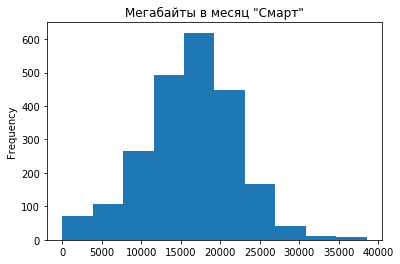

In [72]:
smart['mb_month'].plot(kind='hist', title='Мегабайты в месяц "Смарт"')

Вывод: нормальное распределение

##### Звонки

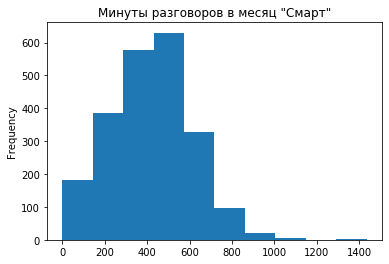

In [73]:
smart['minutes_month'].plot(kind='hist', title='Минуты разговоров в месяц "Смарт"')

Вывод: нормальное распределение

##### Сообщения

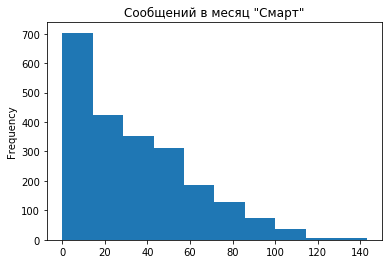

In [74]:
smart['messages_count_month'].plot(kind='hist', title='Сообщений в месяц "Смарт"')

Вывод: распределение Гаусса со смещением вправо

#### Исследование тарифа "Ультра"

Построим гистограммы

In [75]:
ultra = sum_pivot[sum_pivot['tariff'] == 'ultra']

##### Интернет

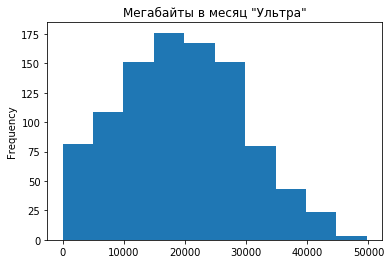

In [76]:
ultra['mb_month'].plot(kind='hist', title='Мегабайты в месяц "Ультра"')

Вывод: нормальное распределение

##### Звонки

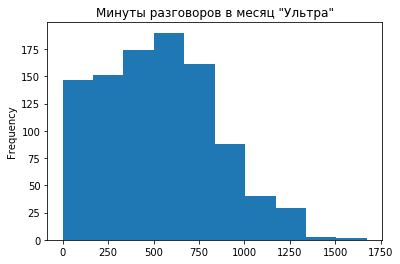

In [77]:
ultra['minutes_month'].plot(kind='hist', title='Минуты разговоров в месяц "Ультра"')

Вывод: нормальное распределение

##### Сообщения

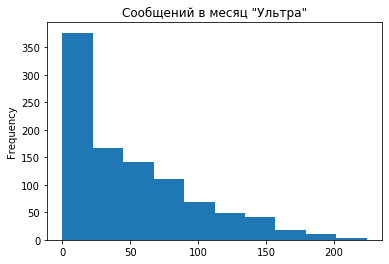

In [78]:
ultra['messages_count_month'].plot(kind='hist', title='Сообщений в месяц "Ультра"')

Вывод: распределение Гаусса со смещением вправо

#### Сравнение выручки тарифов

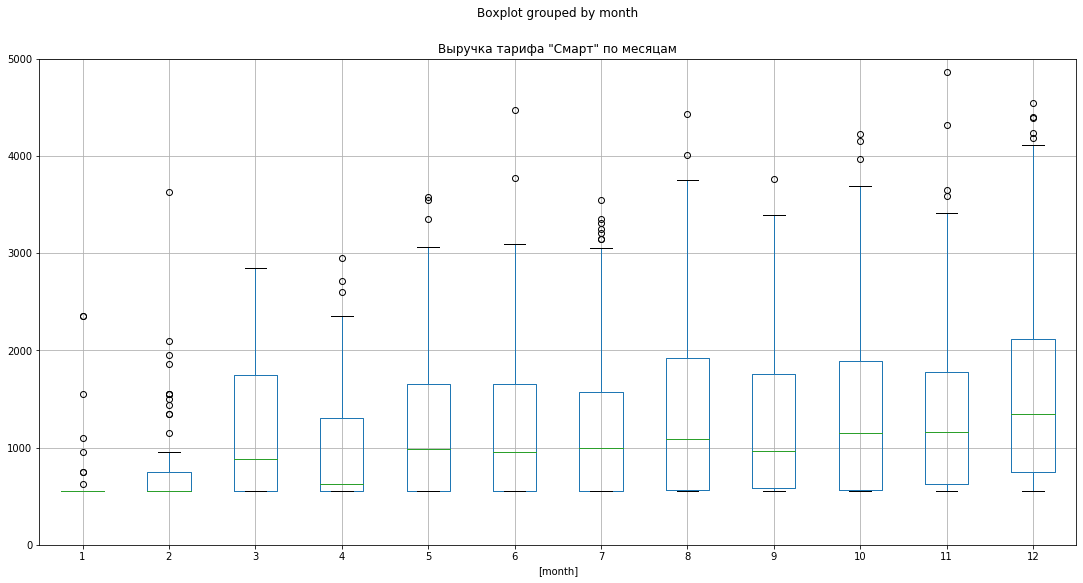

In [79]:
smart[['price', 'month']].boxplot(by='month',figsize=(18,9))
plt.title('Выручка тарифа "Смарт" по месяцам')
plt.ylim(0, 5000)
plt.show()

Вывод: пользователи тарифа "Смарт" часто выходят за лимиты тарифа

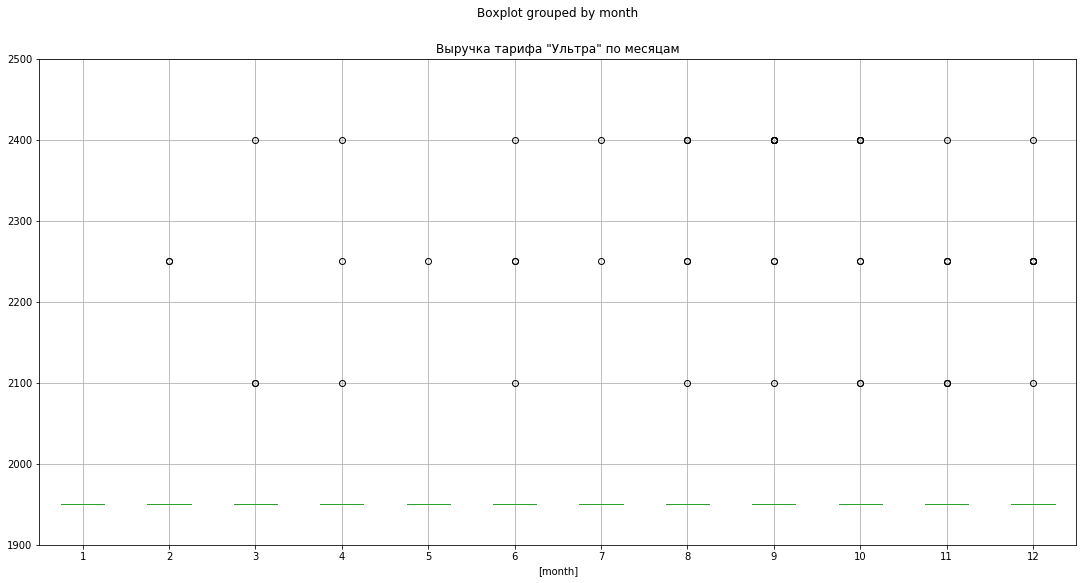

In [80]:
ultra[['price', 'month']].boxplot(by='month',figsize=(18,9))
plt.title('Выручка тарифа "Ультра" по месяцам')
plt.ylim(1900, 2500)
plt.show()

Вывод: пользователи тарифа "Ультра" очень редко выходят за лимиты тарифа

## Проверка гипотез

Гипотеза: Средняя выручка пользователей тарифов «Ультра» и «Смарт» различаются

Нулевая гипотеза: Предположим, что они не различаются, тогда p-value для t-теста этих двух выборок должно быть больше 0.01

Альтернативная гипотеза: Предположим, что они различаются, тогда p-value для t-теста этих двух выборок должно быть меньше 0.01

In [81]:
len(smart['price'])

2229

In [82]:
len(ultra['price'])

985

Т.к. выборки различаются по размеру, параметр equal_var = False

In [83]:
results_smart_ultra = st.ttest_ind(
    smart['price'], 
    ultra['price'], equal_var = False)

results_smart_ultra.pvalue

2.374872488402133e-236

P-value невероятно мало(<<0.01) => отвергаем нулевую гипотезу

Выделим пользователей из Москвы и других городов. Для этого добавим столбец city

In [84]:
sum_pivot = (sum_pivot.join(data_users[['user_id', 'city']].set_index('user_id'), on='user_id',
                                  lsuffix='_l', rsuffix='_r', how='left'))
sum_pivot.head()

,mb_month,mb_per_month_included,messages_count_month,messages_included,minutes_included,minutes_month,price_calls_month,price_internet_month,price_messages_month,rub_per_gb,rub_per_message,rub_per_minute,month,user_id,tariff,price,city
0,2253.49,30720.0,22.0,1000.0,3000.0,159.0,0.0,0.0,0.0,150.0,1.0,1.0,5,1000,ultra,1950.0,Краснодар
1,23233.77,30720.0,60.0,1000.0,3000.0,172.0,0.0,0.0,0.0,150.0,1.0,1.0,6,1000,ultra,1950.0,Краснодар
2,14003.64,30720.0,75.0,1000.0,3000.0,340.0,0.0,0.0,0.0,150.0,1.0,1.0,7,1000,ultra,1950.0,Краснодар
3,14055.93,30720.0,81.0,1000.0,3000.0,408.0,0.0,0.0,0.0,150.0,1.0,1.0,8,1000,ultra,1950.0,Краснодар
4,14568.91,30720.0,57.0,1000.0,3000.0,466.0,0.0,0.0,0.0,150.0,1.0,1.0,9,1000,ultra,1950.0,Краснодар


In [85]:
moscow = sum_pivot[sum_pivot['city']=='Москва']
others = sum_pivot[~(sum_pivot['city']=='Москва')]

Гипотеза: Средняя выручка пользователей из Москвы и других городов различаются

Нулевая гипотеза: Предположим, что они не различаются, тогда p-value для t-теста этих двух выборок должно быть больше 0.01

Альтернативная гипотеза: Предположим, что они не различаются, тогда p-value для t-теста этих двух выборок должно быть больше 0.01

In [86]:
len(moscow)

611

In [87]:
len(others)

2603

Т.к. выборки различаются по размеру, параметр equal_var = False

In [88]:
results_moscow_others= st.ttest_ind(
    moscow['price'], 
    others['price'], equal_var=False)

results_moscow_others.pvalue

0.5737319987867855

P-value велико(>>0.01) => нету причин отклонять нулевую гипотезу

## Общий вывод

Мы ознакомились с небольшой выборкой о платежах пользователей по тарифам "смарт" и "ультра" за год. В выборке отсутствовали пропуски и сильные выбросы.

Мы изучили поведение клиентов и пришли к следующим выводам:

- пользователям тарифа "смарт" нужно в среднем 16200, а "ультра" 19500 мб трафика в месяц.
- пользователям тарифа "смарт" нужно в среднем 420, а "ультра" 525 минут разговора в месяц
- пользователям тарифа "смарт" нужно в среднем 33, а "ультра" 50 сообщений в месяц
- средняя выручка "смарт" составляет 1300, а "ультра" 2070 руб в месяц
- пользователям тарифа "смарт" не хватает заяленных месячных ограничений по тарифу, и они часто выходят за его пределы. Пользователи "ультра", напротив, практически не выбиваются за лимиты.

Мы предположили две гипотезы:
- средняя выручка пользователей тарифов «Ультра» и «Смарт» различаются. Нету оснований отклонить эту гипотезу
- средняя выручка пользователи из Москвы отличается от выручки пользователей из других регионов. Есть основания отклонить эту гипотезу

Рекомендации:
- перевести столбцы с датами в соответствующий формат